<a href="https://colab.research.google.com/github/HwangJae-won/Data_project_practice/blob/main/1002_employee_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv("/content/drive/MyDrive/데이터분석코테/Data/employees.csv")
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


이름, 성별, senior management, team에 결측치 존재

In [59]:
#gender에 대해 0,1 mapping
df["Gender"] = df.Gender.map({"Male":0, "Female":1})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    float64
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [26]:
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,0.0,8/6/1993,12:42 PM,97308,6.945,NaN,Marketing
1,Thomas,0.0,3/31/1996,6:53 AM,61933,4.170,NaN,NaN
2,Maria,1.0,4/23/1993,11:17 AM,130590,11.858,NaN,Finance
3,Jerry,0.0,3/4/2005,1:00 PM,138705,9.340,NaN,Finance
4,Larry,0.0,1/24/1998,4:47 PM,101004,1.389,NaN,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,NaN,Distribution
996,Phillip,0.0,1/31/1984,6:30 AM,42392,19.675,NaN,Finance
997,Russell,0.0,5/20/2013,12:39 PM,96914,1.421,NaN,Product
998,Larry,0.0,4/20/2013,4:45 PM,60500,11.985,NaN,Business Development


<Axes: >

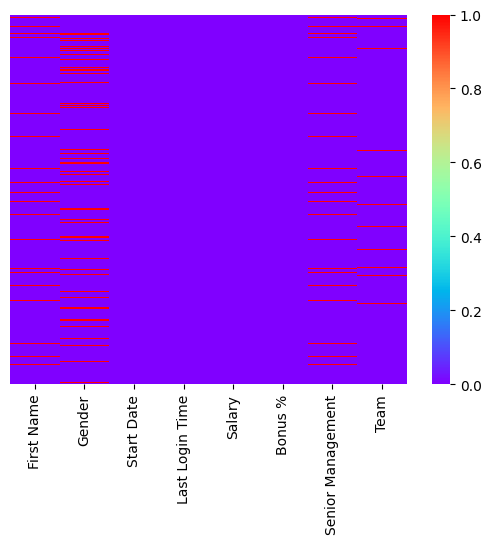

In [30]:
sns.heatmap(df.isnull(),cmap='rainbow',yticklabels=False)

In [35]:
#이름은 대체하기 어려움 : 단순 제거 또는 unknown으로 채우기
df.isnull().sum()/len(df)

First Name           0.067
Gender               0.145
Start Date           0.000
Last Login Time      0.000
Salary               0.000
Bonus %              0.000
Senior Management    0.067
Team                 0.043
dtype: float64

In [60]:
#제거는 하지 말아보자
df["First Name"]=df["First Name"].fillna("Unknownd")

In [40]:
df[df["Senior Management"] ==True]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,0.0,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,0.0,3/31/1996,6:53 AM,61933,4.170,True,NaN
3,Jerry,0.0,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,0.0,1/24/1998,4:47 PM,101004,1.389,True,Client Services
6,Ruby,1.0,8/17/1987,4:20 PM,65476,10.012,True,Product
...,...,...,...,...,...,...,...,...
991,Rose,1.0,8/25/2002,5:12 AM,134505,11.051,True,Marketing
992,Anthony,0.0,10/16/2011,8:35 AM,112769,11.625,True,Finance
993,Tina,1.0,5/15/1997,3:53 PM,56450,19.040,True,Engineering
994,George,0.0,6/21/2013,5:47 PM,98874,4.479,True,Marketing


gender별 다른 변수들의 경향을 보고 대체할 수 있을지 보기

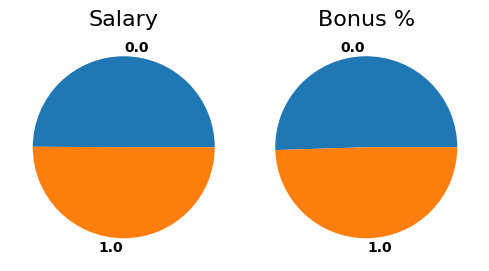

In [47]:
colunas = ['Salary','Bonus %']
plt.figure(figsize=(5,5))
for i, col in enumerate(colunas):
    ax = plt.subplot(1,2, i + 1)
    df.groupby(['Gender'])[col].sum().plot.pie(textprops={'size':10,'fontweight':'bold'})
    plt.title(col, fontsize=16)
    plt.axis('off')
plt.tight_layout()
plt.show()

<ipython-input-51-419301a38a89>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


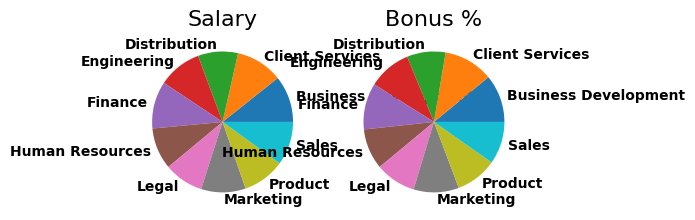

In [51]:
colunas = ['Salary','Bonus %']
plt.figure(figsize=(5,5))
for i, col in enumerate(colunas):
    ax = plt.subplot(1,2, i + 1)
    df.groupby(['Team'])[col].sum().plot.pie(textprops={'size':10,'fontweight':'bold'})
    plt.title(col, fontsize=16)
    plt.axis('off')
plt.tight_layout()
plt.show()

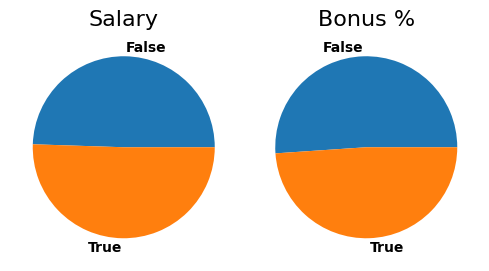

In [52]:
colunas = ['Salary','Bonus %']
plt.figure(figsize=(5,5))
for i, col in enumerate(colunas):
    ax = plt.subplot(1,2, i + 1)
    df.groupby(['Senior Management'])[col].sum().plot.pie(textprops={'size':10,'fontweight':'bold'})
    plt.title(col, fontsize=16)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [61]:
#흠.. 그냥 일단 forward fill 방법으로 채워보자
df['Gender'] = df['Gender'].fillna(method='ffill')
df['Senior Management'] = df['Senior Management'].fillna(method='ffill')
df['Team'] = df['Team'].fillna(method='ffill')

In [54]:
df.isnull().sum()/len(df)

First Name           0.0
Gender               0.0
Start Date           0.0
Last Login Time      0.0
Salary               0.0
Bonus %              0.0
Senior Management    0.0
Team                 0.0
dtype: float64

In [62]:
df["Senior Management"] = df["Senior Management"].map({False:0, True:1})

In [63]:
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,0.0,8/6/1993,12:42 PM,97308,6.945,1,Marketing
1,Thomas,0.0,3/31/1996,6:53 AM,61933,4.170,1,Marketing
2,Maria,1.0,4/23/1993,11:17 AM,130590,11.858,0,Finance
3,Jerry,0.0,3/4/2005,1:00 PM,138705,9.340,1,Finance
4,Larry,0.0,1/24/1998,4:47 PM,101004,1.389,1,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,0.0,11/23/2014,6:09 AM,132483,16.655,0,Distribution
996,Phillip,0.0,1/31/1984,6:30 AM,42392,19.675,0,Finance
997,Russell,0.0,5/20/2013,12:39 PM,96914,1.421,0,Product
998,Larry,0.0,4/20/2013,4:45 PM,60500,11.985,0,Business Development


In [66]:
df["Start Date"][0]

'8/6/1993'

In [70]:
#Date열을 시간으로 대체
df['Start Dated'] = pd.to_datetime(df['Start Date'])
df['Year'] = df['Start Date'].dt.year
df['Month'] = df['Start Date'].dt.month

In [73]:
df=df.drop(["Start Date"], axis= 1)

- 근데 이름은 id같은 거라 예측에는 제외, 시간도 제외=> 시계열로 처리
- 로그 타임은 제외해도 될듯

In [75]:
df=df.drop(["First Name", "Last Login Time"], axis= 1)

In [79]:
df

,Gender,Salary,Bonus %,Senior Management,Team,Date,Year,Month
0,0.0,97308,6.945,1,Marketing,1993-08-06,1993,8
1,0.0,61933,4.170,1,Marketing,1996-03-31,1996,3
2,1.0,130590,11.858,0,Finance,1993-04-23,1993,4
3,0.0,138705,9.340,1,Finance,2005-03-04,2005,3
4,0.0,101004,1.389,1,Client Services,1998-01-24,1998,1
...,...,...,...,...,...,...,...,...
995,0.0,132483,16.655,0,Distribution,2014-11-23,2014,11
996,0.0,42392,19.675,0,Finance,1984-01-31,1984,1
997,0.0,96914,1.421,0,Product,2013-05-20,2013,5
998,0.0,60500,11.985,0,Business Development,2013-04-20,2013,4


<Axes: xlabel='Bonus %', ylabel='Count'>

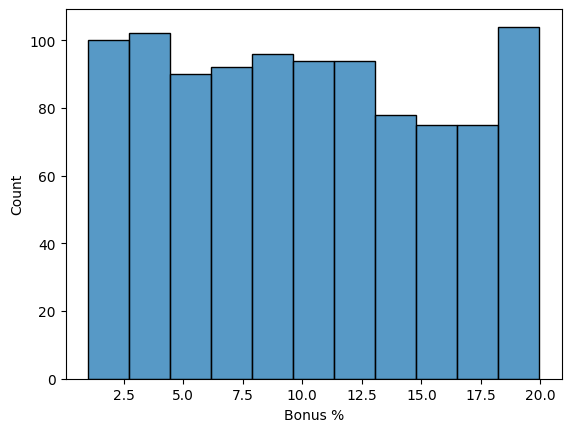

In [81]:
sns.histplot(df["Bonus %"]) #얘만 스케일링하자

In [83]:
cat_idx = ["Team"]
num_idx=["Bonus %"]

In [82]:
#기본적인 전처리를 위한 라이브러리
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [84]:
t = [('cat', OneHotEncoder(handle_unknown = "ignore"), cat_idx), ('num', StandardScaler(), num_idx)]
col_transform = ColumnTransformer(transformers=t)

In [85]:
df

,Gender,Salary,Bonus %,Senior Management,Team,Date,Year,Month
0,0.0,97308,6.945,1,Marketing,1993-08-06,1993,8
1,0.0,61933,4.170,1,Marketing,1996-03-31,1996,3
2,1.0,130590,11.858,0,Finance,1993-04-23,1993,4
3,0.0,138705,9.340,1,Finance,2005-03-04,2005,3
4,0.0,101004,1.389,1,Client Services,1998-01-24,1998,1
...,...,...,...,...,...,...,...,...
995,0.0,132483,16.655,0,Distribution,2014-11-23,2014,11
996,0.0,42392,19.675,0,Finance,1984-01-31,1984,1
997,0.0,96914,1.421,0,Product,2013-05-20,2013,5
998,0.0,60500,11.985,0,Business Development,2013-04-20,2013,4


In [86]:
X= df[["Gender", "Bonus %", "Senior Management", "Team"]]
y = df[["Salary"]]

In [87]:
X_std = col_transform.fit_transform(X)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import mean_squared_error

In [90]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
XGB = XGBRegressor()

In [94]:
models = [LR,DTR,RFR,KNR,KNR,XGB]
result=[]
d = {}
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rmse =np.sqrt(mean_squared_error(y_test, y_pred))
    print(model,":",rmse)
    result.append((model, rmse))

LinearRegression() : 35129.57742459099
DecisionTreeRegressor() : 46626.921491572335


<ipython-input-94-8e4940a9e8e0>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestRegressor() : 36112.3782586389
KNeighborsRegressor() : 36293.299630526846
KNeighborsRegressor() : 36293.299630526846
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 38091.805496649606


- RMSE가 가장 작은 Linear 모델 선정: 피쳐도 적고 데이터도 적어서 작은 모델이 나은 듯.
- 시계열을 반영했어야했다 ,, (연봉에 변화가 있을텐데)